### Statistical Inference Point Estimation

This notebook demostrates the concept of sampling distribution of a statistic. It also shows that
- Sample mean is unbiased
- Sample variance is unbiased
- Analytical solution of sampling variation of mean and variance


Consider a senario: FSU has **20,000** students, their IQ level follows a normal distribution with mean of **110**, and standard deviation of **10**. Let's draw samples from the student population and examine the relationship between sample and population.

## Sample mean

In [2]:
import numpy as np
import matplotlib.pyplot as plt

Generate population data

(array([  10.,  111.,  831., 3070., 5789., 5911., 3229.,  920.,  115.,
          14.]),
 array([ 68.68527182,  76.90414187,  85.12301193,  93.34188198,
        101.56075203, 109.77962208, 117.99849213, 126.21736218,
        134.43623224, 142.65510229, 150.87397234]),
 <BarContainer object of 10 artists>)

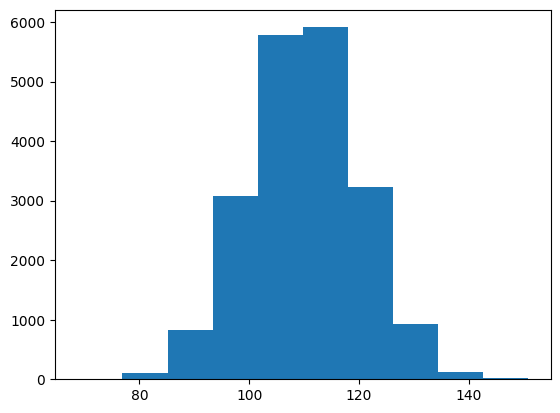

In [3]:
N = 20000 #20,000 students

#Generate from a normal distribution
data = np.random.randn(N)*10 + 110

plt.hist(data)

In [4]:
print("Population mean is:", np.mean(data))
print("Population variance is:", np.var(data))

Population mean is: 110.01334197509755
Population variance is: 100.31695998408146



### Now lets draw samples. Let's start with a sample size of 10 students

In [5]:
#One sample with 10 numbers

sample_10 = np.random.choice(data, 10)

sample_10

array([107.43586473, 111.72915558, 112.11931908, 111.27859605,
       114.47605243, 104.01357472,  95.65004751, 114.00058735,
        97.06746067, 122.35900861])

In [6]:
print("The sample mean is: ", np.mean(sample_10))

The sample mean is:  109.01296667418733


### How about if we repeat the sampling process, say 1,000 times

In [7]:
#Create an empty list to hold the numbers from each sample
sample_10_mean_list = []

for i in range(1000):
    #generate a sample with 10 numbers
    sample = np.random.choice(data, 10)
    
    #compute sample mean
    sample_mean = np.mean(sample)
    
    print(i," sample mean: ", sample_mean)
    
    #append them to the list
    sample_10_mean_list.append(sample_mean)

0  sample mean:  108.00036307479127
1  sample mean:  110.69410428082003
2  sample mean:  107.4873605987134
3  sample mean:  110.19692018903648
4  sample mean:  111.20750970386823
5  sample mean:  110.13122326500063
6  sample mean:  110.65301544766571
7  sample mean:  113.34921582906281
8  sample mean:  108.12181733055836
9  sample mean:  105.21351186647416
10  sample mean:  110.36161729489558
11  sample mean:  109.59835185820104
12  sample mean:  105.84985303513842
13  sample mean:  106.41222061594142
14  sample mean:  110.4719417078021
15  sample mean:  107.35401882289145
16  sample mean:  110.03153994466611
17  sample mean:  107.6998087638583
18  sample mean:  111.35998741829846
19  sample mean:  106.43200189188681
20  sample mean:  111.49838296816327
21  sample mean:  107.48523667758123
22  sample mean:  104.00992462902657
23  sample mean:  109.84937943294103
24  sample mean:  110.9309694210602
25  sample mean:  106.64211610927018
26  sample mean:  107.0643720810308
27  sample mean:

We observe a different sample mean every time we take sample. If we look at their distributions, the sampling distribution of the sample mean is:

(array([  6.,  37.,  77., 219., 272., 209., 129.,  44.,   4.,   3.]),
 array([100.17509478, 102.25997698, 104.34485918, 106.42974138,
        108.51462359, 110.59950579, 112.68438799, 114.76927019,
        116.8541524 , 118.9390346 , 121.0239168 ]),
 <BarContainer object of 10 artists>)

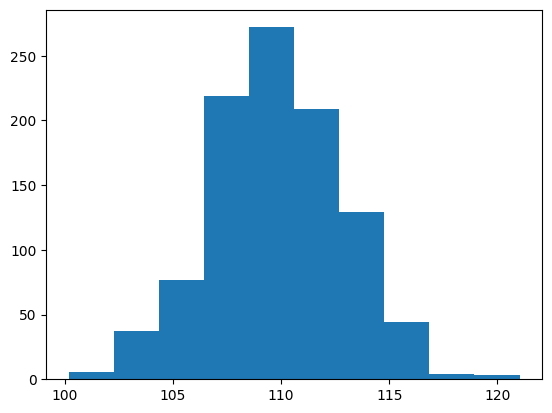

In [75]:
plt.hist(sample_mean_list)

**Important note:** This is not the distribution of IQ level! This is the distribution of average IQ level in a given sample (10 students in a sample) over 1,000 times.

The mean of this distribution is:

In [9]:
np.mean(sample_10_mean_list)

109.9496889158952

Let's compare with the population mean which is:

In [11]:
np.mean(data)

110.01334197509755

Fairly close!

Will it be closer for the sample mean to approach to the true mean if we 1) increase the sample size (10->100); and 2) do more samplings (10,000 -> 1,000,000). YES!

In [12]:
#Create an empty list to hold the numbers from each sample
sample_100_mean_list = []

for i in range(1000000):
    #generate a sample with 10 numbers
    sample = np.random.choice(data, 100)
    
    #compute sample mean
    sample_mean = np.mean(sample)
    
    #print(i," sample mean: ", sample_mean)
    
    #append them to the list
    sample_100_mean_list.append(sample_mean)

In [14]:
print("Average sample mean:", np.mean(sample_100_mean_list))
print("True mean:", np.mean(data))

Average sample mean: 110.01381476400564
True mean: 110.01334197509755


Further increase sample size and sample times will make sample mean to converge to the true population mean, which shows that the sample mean is an **unbiased** statistics.

We can compare the distribution of the sample mean when using two different sample size.

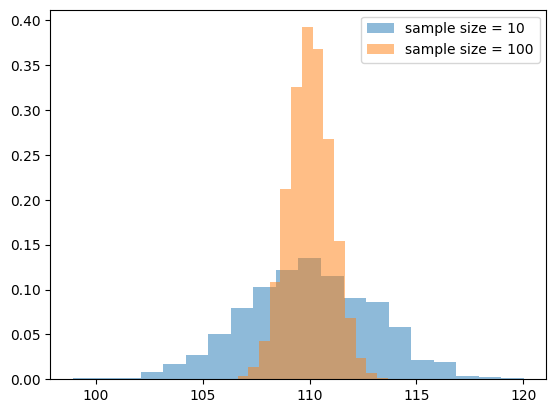

In [16]:
plt.hist(sample_10_mean_list,density=True,alpha=0.5,bins=20,label='sample size = 10')
plt.hist(sample_100_mean_list,density=True,alpha=0.5,bins=20,label='sample size = 100')
plt.legend()

Sampling distribution is wider (i.e., sampling variability is larger) when sample size is smaller!

This is because: analytically, the sampling distribution of the sample mean follows a normal distribution with mean as the population mean and the standard deviation as:$$\frac{\sigma}{\sqrt{n}}$$

where $\sigma$ is the population standard deviation, and $n$ is the sample size.

In [18]:
print("Analytical SD of the sampling distribution:", 
      np.std(data)/np.sqrt(10))

print("Empirical SD of the sampling distribution:", 
      np.std(sample_10_mean_list))

Analytical SD of the sampling distribution: 3.167285272659876
Empirical SD of the sampling distribution: 3.077604412813932


In [19]:
print("Analytical SD of the sampling distribution:", 
      np.std(data)/np.sqrt(100))

print("Empirical SD of the sampling distribution:", 
      np.std(sample_100_mean_list))

Analytical SD of the sampling distribution: 1.001583546111264
Empirical SD of the sampling distribution: 1.0011613417099707


### Similarly, let's examine the sampling distribution of sample variance.

In [20]:
#define a small function to calculate sample variance.
def sample_var(sample):
    mean = np.mean(sample)
    n = sample.shape[0]
    return np.sum((sample - mean)**2)/(n-1)

In [21]:
#One sample with 10 numbers

sample_10 = np.random.choice(data, 10)

sample_10

array([ 90.00287703, 122.08760885, 105.00720831, 116.15163868,
        96.8078801 , 102.36502988, 119.85434114, 130.11855359,
       104.79574327, 112.71091062])

In [22]:
print("Sample variance is:", sample_var(sample_10))

Sample variance is: 153.04302625410688


In [23]:
#generate samples for multiple times
sample_10_variance_list = []

for i in range(10000):
    #generate a sample with 10 numbers
    sample = np.random.choice(data, 10)
    
    #compute sample variance
    sample_variance = sample_var(sample)
    
    print(i," sample variance: ", sample_variance)
    
    #append them to the list
    sample_10_variance_list.append(sample_variance)

0  sample variance:  96.10163756698445
1  sample variance:  46.07059159143764
2  sample variance:  110.65396406369328
3  sample variance:  136.57071556228848
4  sample variance:  82.37470734314662
5  sample variance:  142.9644351287958
6  sample variance:  146.1635373760067
7  sample variance:  57.57180893534298
8  sample variance:  63.700812515550005
9  sample variance:  78.8570570330113
10  sample variance:  151.4604177142045
11  sample variance:  146.1006287733799
12  sample variance:  77.28938134827483
13  sample variance:  91.1491166873888
14  sample variance:  57.51368189428375
15  sample variance:  109.59658670159546
16  sample variance:  33.53064420773122
17  sample variance:  93.78241719352266
18  sample variance:  96.40324757624671
19  sample variance:  33.50187367439599
20  sample variance:  108.61473154299088
21  sample variance:  97.03941815360966
22  sample variance:  79.80044277236952
23  sample variance:  138.12655625946132
24  sample variance:  61.92347832754014
25  sa

Sampling distribution of the variance

(array([ 883., 3156., 2969., 1778.,  757.,  302.,   99.,   37.,   15.,
           4.]),
 array([  8.09839202,  45.11446461,  82.1305372 , 119.14660979,
        156.16268238, 193.17875497, 230.19482756, 267.21090014,
        304.22697273, 341.24304532, 378.25911791]),
 <BarContainer object of 10 artists>)

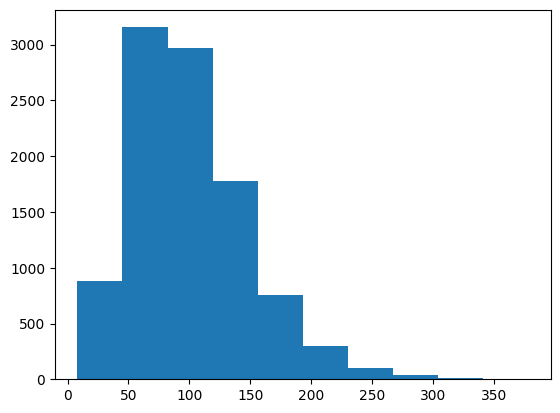

In [25]:
plt.hist(sample_10_variance_list)

In [27]:
print("Average of sample variance:", np.mean(sample_10_variance_list))
print("True variance:", np.var(data))

Average of sample variance: 100.69475903639633
True variance: 100.31695998408146


Again, fairly close!

Increase both sample size and the number of samples:

In [29]:
#generate samples for multiple times
sample_100_variance_list = []

for i in range(1000000):
    #generate a sample with 100 numbers
    sample = np.random.choice(data, 100)
    
    #compute sample variance
    sample_variance = sample_var(sample)
    
    #append them to the list
    sample_100_variance_list.append(sample_variance)

In [30]:
print("Average of sample variance:", np.mean(sample_100_variance_list))
print("True variance:", np.var(data))

Average of sample variance: 100.34635761031726
True variance: 100.31695998408146


Closer!

Compare the sampling distribution of sample mean for two same sizes.

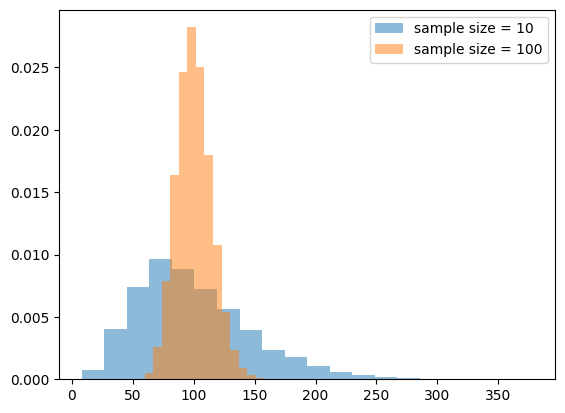

In [32]:
plt.hist(sample_10_variance_list,density=True,alpha=0.5,bins=20,label='sample size = 10')
plt.hist(sample_100_variance_list,density=True,alpha=0.5,bins=20,label='sample size = 100')
plt.legend()

Analytically, the sampling distribution of sample variance follows a chi-square distribution with n - 1 (n is the sample size) degree of freedom.

$$(n-1)s^2/\sigma^2 \sim \chi^2_{n-1}$$

where $s$ is the sample standard deviation and the $\sigma$ is the population standard deviation

numpy function to simulate a chisquare distribution: `random.chisquare(df, size=None)`

In [48]:
anlytical_dist_10 = np.random.chisquare(10-1, 10000)*np.var(data)/(10-1)
anlytical_dist_100 = np.random.chisquare(100-1, 10000)*np.var(data)/(100-1)

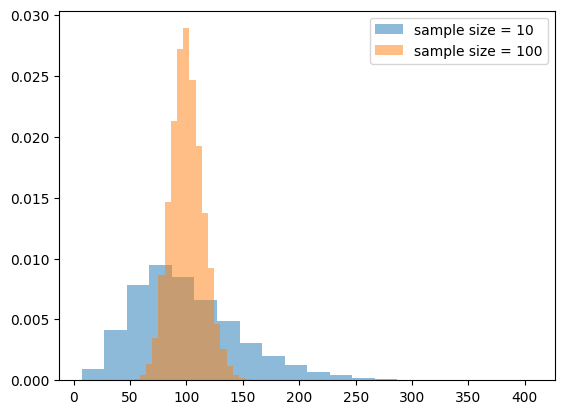

In [49]:
plt.hist(anlytical_dist_10,density=True,alpha=0.5,bins=20,label='sample size = 10')
plt.hist(anlytical_dist_100,density=True,alpha=0.5,bins=20,label='sample size = 100')
plt.legend()

The anlaytical distributions are the same as our emprical sampling distirbutions!